In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
U_G = 12 # Geostrophic velocity [m/s]
C_star = 4.5 # Friction velocity constant [-]
f = 1*10**(-4) # Coriolis parameter [1/s]
k = 0.4 # Von Karman constant [-]
z_h = 100 # hub height [m]
delta_ibl_0 = z_h
z_0lo = 0.0001 # surface rughness length [m] 
C_T = 0.7 # Thrust coefficient [-]
D = 100 # Rotor diameter [m]
s_x = 7 # Streamwise distance [D]
s_y = 7 # Spanwise distance [D]


Eddy Viscosity: $ v_w^* = \frac{V_T}{\kappa u_* z_h} $

Wake Expansion Parameter: $ \beta = \frac{v_w^*}{1 + v_w^*} $

In [3]:
# Planform thrust coefficient
c_ft = (np.pi * C_T)/(4*s_x*s_y)
print("Planform thrust coefficient: ", round(c_ft,3), "[-]")

# Eddy viscosity
v_w_star = 28 * np.sqrt(1/2*c_ft)
print("Eddy Viscosity: ", round(v_w_star,2), "[-]")

# Wake Expansion Parameter
beta = v_w_star / (1 + v_w_star)
print("Wake Expansion Parameter: ", round(beta,2), "[-]")

Planform thrust coefficient:  0.011 [-]
Eddy Viscosity:  2.1 [-]
Wake Expansion Parameter:  0.68 [-]


Effective Roughness height: $ z_{0,hi} = z_h \left( 1+\frac{D}{2z_h} \right)^{\beta} \cdot \exp \left( - \left[ \frac{c_{ft}}{2{\kappa^2}}+ \left( \ln \left[ \frac{z_h}{z_{0,lo}} \left( 1-\frac{D}{2z_h} \right) ^{\beta} \right] \right)^{-2} \right]^{-\frac{1}{2}} \right) $

Friction Velocity: $ u_* = \frac{\kappa U_G}{\ln \left( \frac{U_G}{f z_0} \right) - C_*}  $

In [4]:
# Effective Roughness height
z_0hi = z_h * (1 + D/(2 * z_h))**beta * np.exp(-(c_ft/(2 * k**2) + (np.log(z_h / z_0lo * (1 - D/(2 * z_h))**beta))**-2)**-0.5)
print("Effective Roughness height: ", round(z_0hi, 2), "m")

# Friction Velocity
u_star = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
print("Friction Velocity: ", round(u_star,2), "m/s")

Effective Roughness height:  0.92 m
Friction Velocity:  0.29 m/s


Internal Boundary Layer Height as function of downstream distance: $ \frac{\delta_{ibl}(x)}{z_{0,hi}} = \frac{\delta_{ibl}(0)}{z_{0,hi}} + (\frac{x}{z_{0,hi}})^{\frac{4}{5}} $

Friction velocity as function of downstream distance: $ u_*(x) = u_* \frac{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,lo}} \right)}{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,hi}} \right)}, \;\;\; \delta_{ibl}(x) < H^*_G $



Hub-height velocity as a function of downstream distance: $ U_{hT}(x) = \frac{u_*}{\kappa} \frac{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,lo}} \right)}{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,hi}} \right)} \ln \left[ \left( \frac{z_h}{z_{0,hi}} \right) \left( 1 + \frac{D}{2 z_h} \right)^{\beta} \right] $

In [5]:
# Internal boundary Layer height as a function of downstream distance (x = 0 is upstream edge of wind farm)
x = 0 # Downstream distance from upstream edge [m]
delta_ibl_x = delta_ibl_0 + z_0hi * (x/z_0hi)**(4/5)

# Hub-height velocity as a function of downstream distance
U_hT_x = (u_star / k) * (np.log(delta_ibl_x / z_0lo) / np.log(delta_ibl_x / z_0hi)) * np.log((z_h / z_0hi) * (1 + D/(2 * z_h))**beta)
print("Hub-height velocity as a function of downstream distance: ", round(U_hT_x, 2), "m/s")

Hub-height velocity as a function of downstream distance:  10.7 m/s


Single Turbine Power: $ P = C_P \frac{\rho}{2} U_{hT} \pi \frac{D^2}{4}$

In [6]:
P_x = 0.4 * 1.2/2 * U_hT_x**3 * np.pi * D**2 / 4
print("Power as a function of downstream distance: ", round(P_x/1000000, 2), "MW")

Power as a function of downstream distance:  2.31 MW


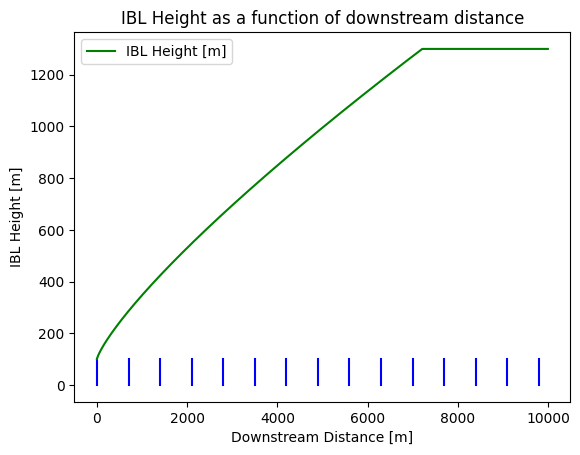

ImportError: cannot import name 'IBL_visualization' from 'IBL_visualization' (/Users/madslangkjaerjakobsen/Desktop/WTABL-1/IBL_visualization.py)

In [7]:
from IBL_visualization import IBL_visualization

x_len = 10000
H_G = 1300

# Hej1
IBL_visualization(x, x_len, delta_ibl_0, z_0hi, u_star, k, z_0lo, beta, H_G)

# banger, vi kaldte grafen